In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Import the SettingWithCopyWarning class from pandas
from pandas.errors import SettingWithCopyWarning

# Suppress specific pandas warnings
warnings.simplefilter(action='ignore', category=SettingWithCopyWarning)

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/nairobi_house_price_prediction/consolidated_data.csv')

df.head()

,Location,Other Location Details,Full Location Details,Size,Bedrooms,Bathrooms,Property Type,Purchase Type,Price,Site
0,Ongata Rongai,Ongata Rongai,"Ongata Rongai,Ongata Rongai",NaN,4.0,2.0,House,Sale,"KSh 16,400,000",buyrentkenya
1,Windy Ridge,Karen,"Windy Ridge,Karen",NaN,4.0,4.0,House,Sale,"KSh 59,000,000",buyrentkenya
2,Phase 2,Buruburu,"Phase 2,Buruburu",NaN,4.0,2.0,House,Sale,"KSh 13,000,000",buyrentkenya
3,Lavington,Lavington,"Lavington,Lavington",NaN,5.0,5.0,House,Sale,"KSh 55,000,000",buyrentkenya
4,Athi river,Kitengela,"Athi river,Kitengela",10000 ft²,4.0,4.0,House,Sale,"KSh 17,000,000",buyrentkenya


In [ ]:
# Renaming the columns
df.columns = df.columns.str.replace(' ', '_').str.lower()

df.head()

,location,other_location_details,full_location_details,size,bedrooms,bathrooms,property_type,purchase_type,price,site
0,Ongata Rongai,Ongata Rongai,"Ongata Rongai,Ongata Rongai",NaN,4.0,2.0,House,Sale,"KSh 16,400,000",buyrentkenya
1,Windy Ridge,Karen,"Windy Ridge,Karen",NaN,4.0,4.0,House,Sale,"KSh 59,000,000",buyrentkenya
2,Phase 2,Buruburu,"Phase 2,Buruburu",NaN,4.0,2.0,House,Sale,"KSh 13,000,000",buyrentkenya
3,Lavington,Lavington,"Lavington,Lavington",NaN,5.0,5.0,House,Sale,"KSh 55,000,000",buyrentkenya
4,Athi river,Kitengela,"Athi river,Kitengela",10000 ft²,4.0,4.0,House,Sale,"KSh 17,000,000",buyrentkenya


The dataframe comprises ten columns, each providing specific details about the properties:

1. **Location**: This column provides primary information about the property's geographic location.

2. **Other Location Details**: Offers additional details about the property's location.

3. **Full Location Details**: combines both column 1 & 2 above

4. **Size**: Represents the total area of the property, typically measured in square feet or square meters.

5. **Bedrooms**: Indicates the number of bedrooms in the property, providing insight into its capacity and suitability for potential occupants.

6. **Bathrooms**: Shows the count of bathrooms in the property.

7. **Price**: Serves as the dependent variable, showing the property's price. For properties listed for sale, this is the total purchase price; for rental properties, it represents the monthly rental price.

8. **Property Type**: Details the kind of property being described. This could be a house, apartment, bedsitter or 'other'. Other here could mean either a piece of land, an office.

9. **Purchase Type**: Specifies the nature of the transaction, whether the property is available for sale or for rent.

10. **Site**: Identifies the source from which the property information was extracted, providing insight into the data's origin or platform.

In [ ]:
# Dropping the site column
df.drop('site', axis=1, inplace=True)

df.columns

Index(['location', 'other_location_details', 'full_location_details', 'size',
       'bedrooms', 'bathrooms', 'property_type', 'purchase_type', 'price'],
      dtype='object')

#Data Cleaning and EDA.

The data was sourced from online platforms and is not ready for modeling. Our next steps will involve a detailed examination of our dataset and preparing the data for modeling.

## property_type column

In [ ]:
df['property_type'].value_counts()

,count
property_type,
Apartment,14611
House,14095
Other,521
Bedsitter,12


There are 521 rows labeled as 'Other' in the property type column. We will remove these rows to focus our analysis on specific property types such as houses, apartments, and bedsitters.

In [ ]:
df = df[df['property_type'] != 'Other']

In [ ]:
df['property_type'].value_counts()

,count
property_type,
Apartment,14611
House,14095
Bedsitter,12


After removing the rows labeled as 'Other,' we will address the 'Bedsitters' category. With only 12 rows, this category lacks sufficient data for robust modeling. We'll consider combining 'Bedsitters' with 'Apartments' due to their similar characteristics. However, before doing so, we'll first examine the number of bedrooms and bathrooms in these bedsitters.

In [ ]:
# Filter the DataFrame for rows where the property type is 'Bedsitter'
bedsitter_data = df[df['property_type'] == 'Bedsitter']

# Replace 'None' with NaN for consistent handling
bedsitter_data['bedrooms'] = bedsitter_data['bedrooms'].replace('None', pd.NA)
bedsitter_data['bathrooms'] = bedsitter_data['bathrooms'].replace('None', pd.NA)

# Get the distribution of bedrooms and bathrooms, including 'None'
bedrooms_distribution = bedsitter_data['bedrooms'].value_counts(dropna=False)
bathrooms_distribution = bedsitter_data['bathrooms'].value_counts(dropna=False)

# Display the distributions
print("Bedrooms Distribution for Bedsitters:")
print(bedrooms_distribution)
print("\nBathrooms Distribution for Bedsitters:")
print(bathrooms_distribution)

Bedrooms Distribution for Bedsitters:
bedrooms
NaN    12
Name: count, dtype: int64

Bathrooms Distribution for Bedsitters:
bathrooms
NaN    12
Name: count, dtype: int64


The scraped data indicates that bedsitters have no bathrooms or bedrooms listed. We'll update these entries to reflect 1 bathroom and 1 bedroom, as this is generally accurate for bedsitters.

In [ ]:
# Filter the DataFrame for rows where the property type is 'Bedsitter'
bedsitter_data = df[df['property_type'] == 'Bedsitter']

# Replace 'None' with 1 for both bathrooms and bedrooms
bedsitter_data['bedrooms'] = bedsitter_data['bedrooms'].replace(np.NaN, 1)
bedsitter_data['bathrooms'] = bedsitter_data['bathrooms'].replace(np.NaN, 1)

# Update the original DataFrame with the modified bedsitter data
df.update(bedsitter_data)

# Display the updated DataFrame for verification
print("Updated DataFrame with corrected Bedsitters:")
print(df[df['property_type'] == 'Bedsitter'])

Updated DataFrame with corrected Bedsitters:
                             location   other_location_details  \
12519                           Kinoo                   Kikuyu   
12520                           Karen                    Karen   
12521                            Road           Bongani, Karen   
12522                            Road            Marist, Karen   
12523                       Riverside                Westlands   
12524                  Westlands Area                Westlands   
12525                           Ruaka                    Ruaka   
12526                      Upper Hill               Upper Hill   
12527                        Kilimani                 Kilimani   
12528  Bishop Street - ATL Apartments                    Ruiru   
12529                          Sophia  Homa Bay Town, Homa Bay   
12530                      Studio 103          Mwimuto, Kabete   

                      full_location_details   size  bedrooms  bathrooms  \
12519                

The update has been successfully applied. Next, we will rename 'Bedsitters' to 'Apartments'.

In [ ]:
# Replace 'Bedsitter' with 'Apartment' in the property_type column
df['property_type'] = df['property_type'].replace('Bedsitter', 'Apartment')
# Confirm this has happened
df['property_type'].value_counts()

,count
property_type,
Apartment,14623
House,14095


Apartments value count has increased by 12 meaning bedsitters have been successfully renamed into apartments.

In [ ]:
print(f'Current number of rows: {df.shape[0]}')
print(f'Current number of columns: {df.shape[1]}')

Current number of rows: 28718
Current number of columns: 9


In [ ]:
df.head()

,location,other_location_details,full_location_details,size,bedrooms,bathrooms,property_type,purchase_type,price
0,Ongata Rongai,Ongata Rongai,"Ongata Rongai,Ongata Rongai",NaN,4.0,2.0,House,Sale,"KSh 16,400,000"
1,Windy Ridge,Karen,"Windy Ridge,Karen",NaN,4.0,4.0,House,Sale,"KSh 59,000,000"
2,Phase 2,Buruburu,"Phase 2,Buruburu",NaN,4.0,2.0,House,Sale,"KSh 13,000,000"
3,Lavington,Lavington,"Lavington,Lavington",NaN,5.0,5.0,House,Sale,"KSh 55,000,000"
4,Athi river,Kitengela,"Athi river,Kitengela",10000 ft²,4.0,4.0,House,Sale,"KSh 17,000,000"


## price Column

In [ ]:
# Descriptive analysis of the column

df['price'].describe()

,price
count,28702
unique,1461
top,"KSh 10,000"
freq,1024


There are 28,702 rows with valid price data, though we initially identified 28,718 total rows. Upon examining the CSV file, we found that some rows contain 'None' or 'Price not communicated' in the price column. Let's determine the exact number of such rows.

In [ ]:
# Finding the unique values under the price column
# df['price'].value_counts()

In [ ]:
# Count rows with 'None' or 'Price not communicated' in the 'price' column
none_count = df[df['price'] == 'None'].shape[0] #shape[0] gives the number of rows while shape[1] gives the number of columns
not_communicated_count = df[df['price'] == 'Price not communicated'].shape[0]

# Calculate total count of invalid price entries
total_invalid_price_count = none_count + not_communicated_count

# Print the results
print(f"Rows with 'None' in price: {none_count}")
print(f"Rows with 'Price not communicated': {not_communicated_count}")
print(f"Total rows with invalid price data: {total_invalid_price_count}")

Rows with 'None' in price: 0
Rows with 'Price not communicated': 72
Total rows with invalid price data: 72


This explanation is unlikely to be the root cause. To address the issue, we will enhance the data structure by introducing a new column named price_currency to store the currency information (e.g., Ksh/$) as indicated in the price column. Additionally, we will create a price_period column to record the time period associated with the price (price rows marked with '/ month').Also, we will remove the commas in the price. For entries marked as 'Price not communicated,' we will set the value to 1000000000 in these new columns. After implementing these changes, we will remove the additional columns and update the price column where necessary to reflect 1000000000.

In [ ]:
# Remove quotes and leading/trailing whitespace
df['price'] = df['price'].str.replace('"', '').str.strip()

# Initialize new columns
df['price_currency'] = None
df['price_period'] = None

# Extract currency
df['price_currency'] = df['price'].str.extract(r'^(KSh|\$)')
df['price'] = df['price'].str.replace(r'^(KSh|\$)\s*', '', regex=True)

# Extract period
df['price_period'] = df['price'].str.extract(r'(/ month)$')
df['price'] = df['price'].str.replace(r'(/ month)$', '', regex=True)

# Replace 'Price not communicated' and 'None' with 1000000000
df['price'] = df['price'].replace(['Price not communicated', 'None'], '1000000000')

# Remove commas and convert to numeric
df['price'] = df['price'].str.replace(',', '')
df['price'] = pd.to_numeric(df['price'])

# Display the updated DataFrame
df.head()

,location,other_location_details,full_location_details,size,bedrooms,bathrooms,property_type,purchase_type,price,price_currency,price_period
0,Ongata Rongai,Ongata Rongai,"Ongata Rongai,Ongata Rongai",NaN,4.0,2.0,House,Sale,16400000.0,KSh,NaN
1,Windy Ridge,Karen,"Windy Ridge,Karen",NaN,4.0,4.0,House,Sale,59000000.0,KSh,NaN
2,Phase 2,Buruburu,"Phase 2,Buruburu",NaN,4.0,2.0,House,Sale,13000000.0,KSh,NaN
3,Lavington,Lavington,"Lavington,Lavington",NaN,5.0,5.0,House,Sale,55000000.0,KSh,NaN
4,Athi river,Kitengela,"Athi river,Kitengela",10000 ft²,4.0,4.0,House,Sale,17000000.0,KSh,NaN


In [ ]:
# # Save the updated DataFrame to a CSV file
# df.to_csv('updated_currency_data.csv', index=False)

# # Confirmation message
# print("DataFrame has been saved to 'updated_currency_data.csv'.")

The DataFrame has been successfully updated. Next, we'll convert prices listed in dollars ($) to Kenyan shillings (KSh). We will use the conversion rate of 1 USD = Ksh 100

In [ ]:
conversion_rate = 100

# Convert prices from $ to KSh
df.loc[df['price_currency'] == '$', 'price'] *= conversion_rate
df.loc[df['price_currency'] == '$', 'price_currency'] = 'KSh'

# Display the updated DataFrame
print("Prices successfully converted")

Prices successfully converted


Let's now examine this column for potential outliers. At this stage, we will not address these outliers, as their presence might be influenced by the distribution of data across different groups. Specifically, the groups could be defined by the number of bedrooms, bathrooms, property type, or location. Addressing outliers without considering these groupings could lead to biased conclusions.

In [ ]:
# Checking for outliers
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))].count().sum()

28838

This is the number of outliers based on the median. Let us plot this

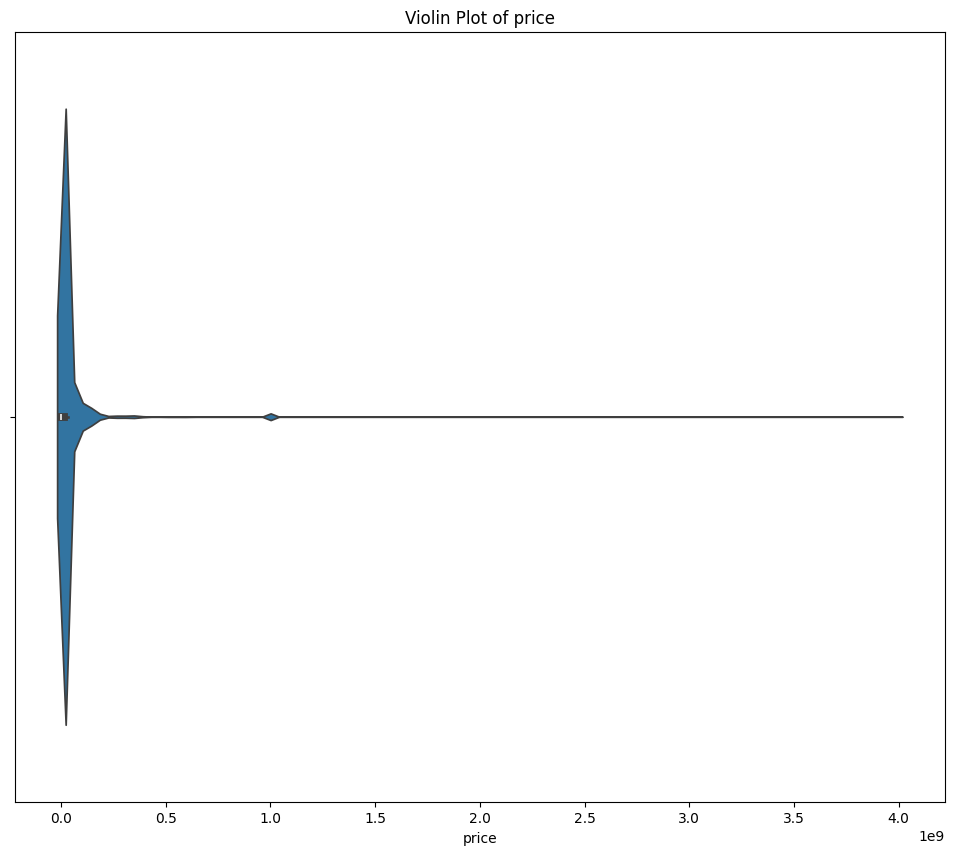

In [ ]:
# Set the figure size
plt.figure(figsize=(12, 10))

# Create a horizontal violin plot
sns.violinplot(data=df, x='price', orient='h')

# Set the title and labels
plt.title('Violin Plot of price')
plt.xlabel('price')

# Show the plot
plt.show()

Let us try finding the number of outliers based on the mean.

In [ ]:
# Calculate the mean and standard deviation of the price column
mean_price = df['price'].mean()
std_price = df['price'].std()

# Define a threshold for identifying outliers
threshold = 3

# Calculate the Z-scores for each price
df['z_score'] = (df['price'] - mean_price) / std_price

# Identify outliers
outliers = df[np.abs(df['z_score']) > threshold]

# Number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print(f"Number of outliers in the price column: {num_outliers}")

# Optionally, you can remove the z_score column after calculation
df = df.drop(columns=['z_score'])

Number of outliers in the price column: 284


Finally, let's proceed to remove the newly created 'price_currency' and 'price_period' columns and where the rows where price is marked with 1000000000

In [ ]:
# Remove rows where price is 1000000000
df = df[df['price'] != 1000000000]

# Drop the 'price_currency' and 'price_period' columns
df.drop(columns=['price_currency', 'price_period'], inplace=True)

# Display the updated DataFrame
print("Updated DataFrame after removing specified rows and columns:")
df.head()

Updated DataFrame after removing specified rows and columns:


,location,other_location_details,full_location_details,size,bedrooms,bathrooms,property_type,purchase_type,price
0,Ongata Rongai,Ongata Rongai,"Ongata Rongai,Ongata Rongai",NaN,4.0,2.0,House,Sale,16400000.0
1,Windy Ridge,Karen,"Windy Ridge,Karen",NaN,4.0,4.0,House,Sale,59000000.0
2,Phase 2,Buruburu,"Phase 2,Buruburu",NaN,4.0,2.0,House,Sale,13000000.0
3,Lavington,Lavington,"Lavington,Lavington",NaN,5.0,5.0,House,Sale,55000000.0
4,Athi river,Kitengela,"Athi river,Kitengela",10000 ft²,4.0,4.0,House,Sale,17000000.0


##full_location_details Column

The list includes a diverse range of wards and locations. To better organize the data, we will create a dictionary mapping locations to their respective sub-counties. By referencing this dictionary, we will identify the constituency for each ward mentioned in the `other_location_details` row and populate a new `sub_county` column accordingly. We will use this link for the sub_county-Ward/Location mapping: http://countytrak.infotrakresearch.com/nairobi-county/. Also, in order to get more data points, we will include the locaions close to Nairobi county such as Ongata Rongai, Limuru etc and map them to sub-counties in Nairobi eg, Langata, Westlands etc.

In [ ]:
import re

# Create the dictionary
location_to_subcounty = {
    'Westlands': ['Kitisuru', 'Parklands', 'Highridge', 'Karura', 'Kangemi', 'Mountain View', 'Muthaiga', 'Westlands', 'Limuru','Redhill', 'Kiambu Road', 'Ruaka', 'Banana', 'Parkland', 'Hurlingham','Upper Hill', 'Brookside', 'Kyuna', 'Museum Hill', 'Muthangari', 'Nyari', 'Tigoni','Lower Kabete', 'Gigiri', 'Runda', 'Loresho', 'Rosslyn', 'Riverside', 'Thigiri'],
    'Dagoretti North': ['Kilimani', 'Kawangware', 'Gatina', 'Kileleshwa', 'Kabiro', 'Dagoretti North', 'Dagoretti Corner', 'Lavington', 'Valley Arcade', 'Riruta', 'Naivasaha Road', 'Riaira', 'Riara Road'],
    'Dagoretti South': ['Mutu-Ini', 'Ngando', 'Riruta', 'Uthiru', 'Ruthimitu', 'Waithaka', 'Dagoretti South', 'Kikuyu Town', 'Kikuyu'],
    'Langata': ['Karen', 'Nairobi West', 'Mugumu-Ini', 'South C', 'Nyayo Highrise', 'Nyayo', 'Ngong', 'Langata', 'Ongata Rongai', 'Rongai', 'Madaraka', 'Kiserain', 'South B','Bomas of Kenya', 'Golden Estate'],
    'Kibra': ['Laini Saba', 'Lindi Makina','Woodley','Kenyattta Golf Course', 'Sarangombe', 'Kibra', 'Jamhuri', 'Ngumo'],
    'Roysambu': ['Githurai', 'Kahawa West','Zimmerman', 'Roysambu', 'Kahawa Sukari', 'Kahawa Wendani', 'Ruiru', 'Ngecha','Juja', 'Kenyatta Road', 'Thika', 'Ridgeways', 'Mirema Drive','Garden Estate', 'Mirema', 'Tatu City'],
    'Kasarani': ['Clay City', 'Mwiki', 'Kasarani', 'Njiru', 'Ruai', 'Saika', 'Thika Road', 'Chokaa', 'Thome','Peponi', 'Garden City', 'Thindigua'],
    'Ruaraka': ['Baba Dogo', 'Utalii', 'Matahare North', 'Lucky Summer', 'Korogocho', 'Ruaraka'],
    'Embakasi West': ['Umoja I', 'Umoja One', 'Umoja 1', 'Umoja II', 'Umoja Two', 'Umoja 2', 'Umoja', 'Mowelm', 'Kariobangi South', 'Maringo', 'Hamza', 'Embakasi West', 'Donholm'],
    'Embakasi East': ['Upper Savannah', 'Lower Savannah', 'Savannah', 'Embakasi', 'Utawala', 'Mihango', 'Embakasi East','Kamulu', 'Joska', 'Malaa'],
    'Embakasi North': ['Kariobangi North', 'Dandora', 'Embakasi North'],
    'Embakasi South': ['Imara Daima', 'Kwa Njenga', 'Kwa Reuben', 'Pipeline', 'Kware', 'Embakasi South', 'Kitengela', 'Syokimau', 'Mlolongo', 'Athi River', 'Mombasa Road', 'Mombasa Rd', 'Fedha'],
    'Embakasi Central': ['Kayole', 'Kayole North', 'Kayole South', 'Kayole Central', 'Komarock', 'Matopeni', 'Spring Valley', 'Embakasi Central'],
    'Makadara': ['Viwandani', 'Harambee', 'Makongeni', 'Pumwani', 'Eastleigh North','Makadara','Buruburu', 'Jogoo Road', 'Industrial Area'],
    'Kamukunji': ['Eastleigh South', 'Airbase', 'California', 'Ngara', 'Nairobi Central', 'Kamukunji'],
    'Starehe': ['Pangani', 'Ziwani', 'Kariokor', 'Landimawe', 'Nairobi South', 'Hospital', 'Starehe'],
    'Mathare': ['Mabatini', 'Huruma', 'Ngei', 'Mlango Kubwa', 'Kiamaiko', 'Mathare']
}

# Flatten the dictionary into a list of (location, subcounty) pairs
location_to_subcounty_list = [(loc, subcounty) for subcounty, locations in location_to_subcounty.items() for loc in locations]

# Create a dictionary for quick lookup
location_to_subcounty_dict = dict(location_to_subcounty_list)

# Function to get subcounty based on regex matching
def get_subcounty(other_location_details):
    for loc, subcounty in location_to_subcounty_dict.items():
        # Create a regex pattern to match the location name, ignoring case and allowing for partial matches
        pattern = re.compile(re.escape(loc), re.IGNORECASE)
        if pattern.search(other_location_details):
            return subcounty
    return 'Unknown'  # Default if no match is found

# Apply the function to create the 'sub_county' column
df['sub_county'] = df['full_location_details'].apply(get_subcounty)

# Display the updated DataFrame
print(df)

                                                location  \
0                                          Ongata Rongai   
1                                            Windy Ridge   
2                                                Phase 2   
3                                              Lavington   
4                                             Athi river   
...                                                  ...   
29234       Rhapta Road Westlands Area Westlands Nairobi   
29235                Argwings Kodhek Rd Kilimani Nairobi   
29236                       6th Avenue Parklands Nairobi   
29237  General Mathenge drive General Mathenge Westla...   
29238         waiyaki way Uthiru Dagoretti South Nairobi   

                                  other_location_details  \
0                                          Ongata Rongai   
1                                                  Karen   
2                                               Buruburu   
3                                      

We have resolved the location issue and can now proceed with the updated DataFrame. You can uncomment the code below, run it to save the new DataFrame, and view the results

In [ ]:
# # Save the updated DataFrame to a CSV file
# df.to_csv('updated_sub_county_data.csv', index=False)

# # Confirmation message
# print("DataFrame has been saved to 'updated_sub_county_data.csv'.")

In [ ]:
df['sub_county'].describe()

,sub_county
count,28646
unique,18
top,Dagoretti North
freq,9025


The updated DataFrame contains 28,646 rows, with each row having data in the sub_county column, representing the total number of rows in the DataFrame. Let's confirm the distribution of the sub_counties.

In [ ]:
df['sub_county'].value_counts()

,count
sub_county,
Dagoretti North,9025
Westlands,8486
Langata,3102
Roysambu,1602
Unknown,1587
Embakasi South,1405
Embakasi West,669
Kasarani,647
Embakasi East,566


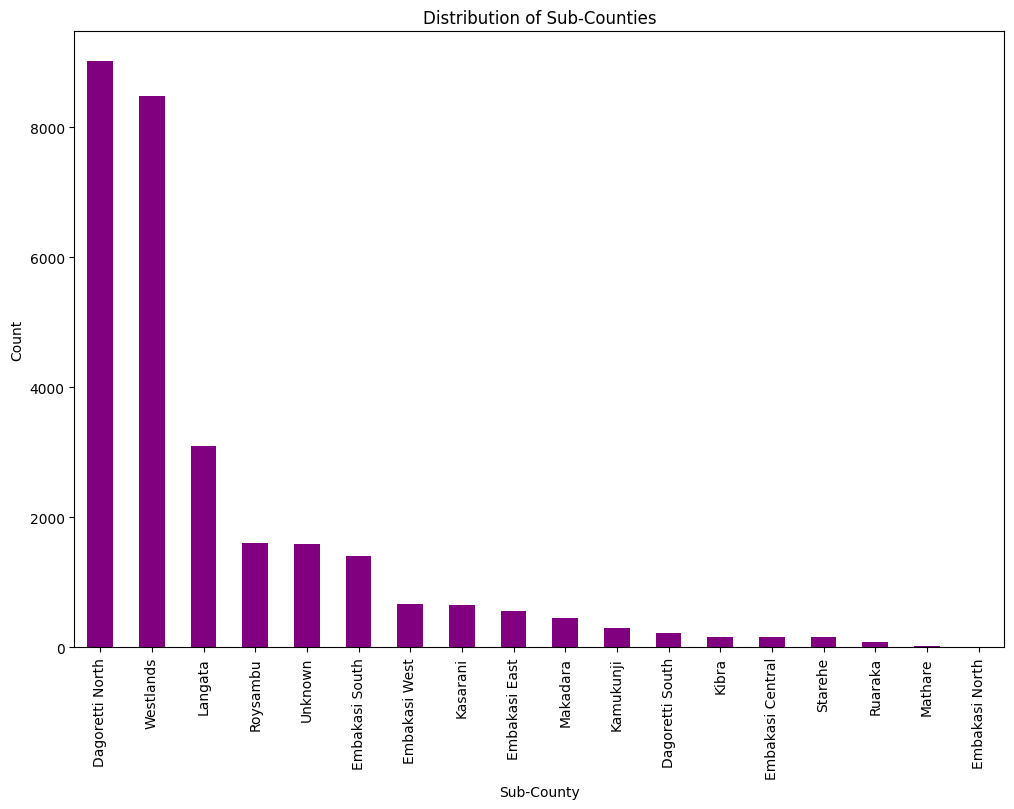

In [ ]:
sub_county_counts = df['sub_county'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sub_county_counts.plot(kind='bar', color= 'Purple')
plt.title('Distribution of Sub-Counties')
plt.xlabel('Sub-County')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

From the graph above, we observe that our data is unevenly distributed. To address this issue, we will group sub-counties that are geographically or contextually similar. Specifically, we will:

1. Combine all Embakasi areas into a single group.
2. Merge Kariobangi, Ruaraka, Kasarani, Mathare, Makadara, and Kamukunji into one group.
3. Add Kibra to the Lang'ata group.
4. Combine Starehe with Westlands.
5. Add Dagoretti South to the Dagoretti North group.

This approach will ensure a sufficient number of classes. During preprocessing, we will map the user's selected location to one of these consolidated groups.

We will also remove rows where the 'Location' is marked as 'Unknown,' as these areas are outside Nairobi

### Making adjustments to the sub_county column.

In [ ]:
# Define the mapping for the new groups
mapping = {
    'Dagoretti North': 'Dagoretti North',
    'Westlands': 'Westlands & Starehe',
    'Langata': 'Langata & Kibra',
    'Roysambu': 'Embakasi Areas',
    'Unknown': 'Unknown',
    'Embakasi South': 'Embakasi Areas',
    'Embakasi West': 'Embakasi Areas',
    'Kasarani': 'Embakasi Areas',
    'Embakasi East': 'Embakasi Areas',
    'Makadara': 'Embakasi Areas',
    'Kamukunji': 'Embakasi Areas',
    'Dagoretti South': 'Dagoretti North',
    'Kibra': 'Langata & Kibra',
    'Embakasi Central': 'Embakasi Areas',
    'Starehe': 'Westlands & Starehe',
    'Ruaraka': 'Embakasi Areas',
    'Mathare': 'Embakasi Areas',
    'Embakasi North': 'Embakasi Areas'
}

# Apply the mapping to create a new column
df['new_sub_county'] = df['sub_county'].map(mapping)

# # Group by the new_sub_county and sum the counts
# result = df.groupby('new_sub_county')['count'].sum().reset_index()

print('Successfully updated the new_cub_counties')

Successfully updated the new_cub_counties


In [ ]:
df['new_sub_county'].describe()

,new_sub_county
count,28646
unique,5
top,Dagoretti North
freq,9243


Now Let us drop the 'Unknown' sub_counties

In [ ]:
df = df[df['new_sub_county'] != 'Unknown']

df['new_sub_county'].value_counts()

,count
new_sub_county,
Dagoretti North,9243
Westlands & Starehe,8638
Embakasi Areas,5911
Langata & Kibra,3267


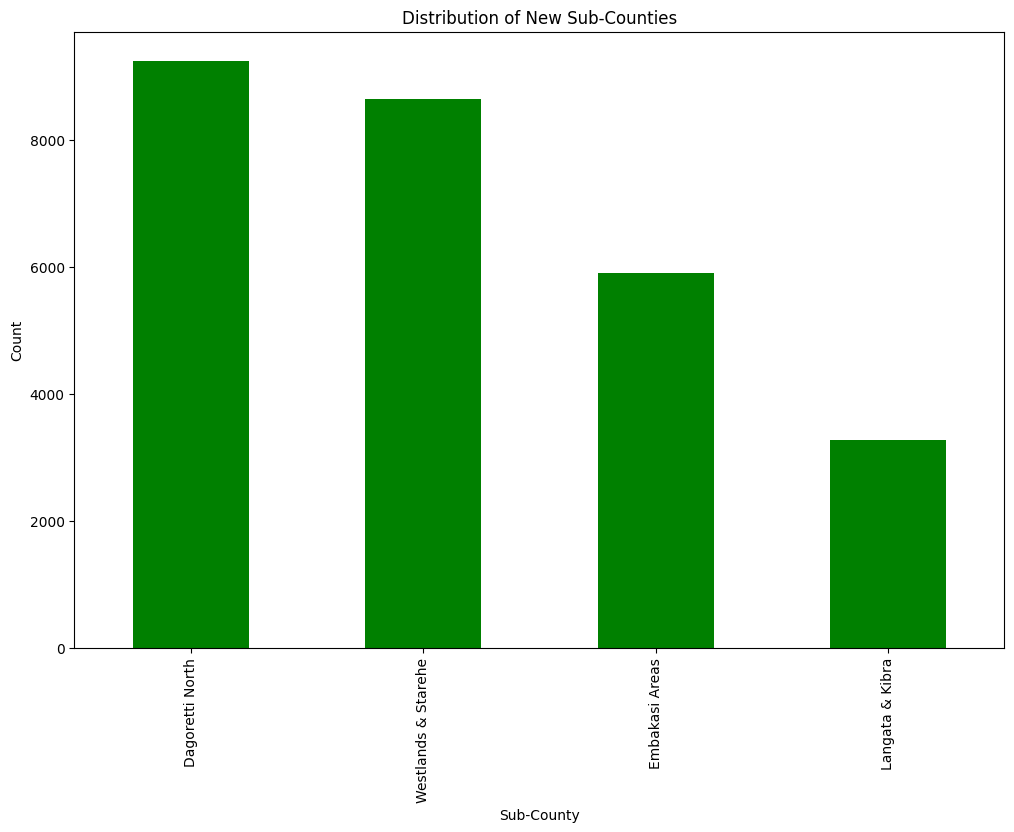

In [ ]:
sub_county_counts = df['new_sub_county'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sub_county_counts.plot(kind='bar', color= 'Green')
plt.title('Distribution of New Sub-Counties')
plt.xlabel('Sub-County')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

We will proceed to remove the location, other_location_details, full_location_details and sub_county columns since we will not need them any more.

In [ ]:
df.drop(columns=['location', 'other_location_details', 'full_location_details', 'sub_county'], inplace=True)

df.head()

,size,bedrooms,bathrooms,property_type,purchase_type,price,new_sub_county
0,NaN,4.0,2.0,House,Sale,16400000.0,Langata & Kibra
1,NaN,4.0,4.0,House,Sale,59000000.0,Langata & Kibra
2,NaN,4.0,2.0,House,Sale,13000000.0,Embakasi Areas
3,NaN,5.0,5.0,House,Sale,55000000.0,Dagoretti North
4,10000 ft²,4.0,4.0,House,Sale,17000000.0,Embakasi Areas


We can now proceed with the bedrooms and bathrooms columns

##bedroom and bathrooms columns

In [ ]:
df['bedrooms'].describe()

,bedrooms
count,26638.000000
mean,2.634732
std,1.441843
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,10.000000


In [ ]:
df['bedrooms'].value_counts()

,count
bedrooms,
1.0,6551
2.0,6522
3.0,5709
4.0,4381
5.0,2434
0.0,466
6.0,395
7.0,118
10.0,32


In [ ]:
nan_bedroom_count = df['bedrooms'].isna().sum()
zero_bedroom_count = (df['bedrooms'] == 0).sum()
print(f"Number of NaN values in 'bedrooms': {nan_bedroom_count}")
print(f"Number of zero values in 'bedrooms': {zero_bedroom_count}")

Number of NaN values in 'bedrooms': 421
Number of zero values in 'bedrooms': 466


There exists both NaN and zero values in the bedroom column.

In [ ]:
df['bathrooms'].describe()

,bathrooms
count,25801.000000
mean,2.733964
std,1.582608
min,0.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,10.000000


In [ ]:
df['bathrooms'].value_counts()

,count
bathrooms,
1.0,7138
2.0,5501
3.0,4633
4.0,4153
5.0,2955
6.0,842
0.0,309
7.0,170
8.0,59


In [ ]:
nan_bathroom_count = df['bathrooms'].isna().sum()
zero_bathroom_count = (df['bathrooms'] == 0).sum()
print(f"Number of NaN values in 'bathrooms': {nan_bathroom_count}")
print(f"Number of zero values in 'bathrooms': {zero_bathroom_count}")

Number of NaN values in 'bathrooms': 1258
Number of zero values in 'bathrooms': 309


There exists both NaN and zero values in the bathrooms column.

Let's check for any correlation between the bathrooms and bedrooms columns.

In [ ]:
bath_bed_corr = df[['bedrooms', 'bathrooms']].corr()

print(f'The correlation between the bathrooms and bedrooms columns is:')
bath_bed_corr

The correlation between the bathrooms and bedrooms columns is:


,bedrooms,bathrooms
bedrooms,1.000000,0.918681
bathrooms,0.918681,1.000000


Our analysis shows both NaN and zero values in the bathrooms and bedrooms columns, with more missing bathroom values than bedroom values. There are also more properties with zero bedrooms than zero bathrooms. We found a strong positive correlation of 0.918681 between the number of bedrooms and bathrooms, indicating that they often increase together. However, this correlation does not imply causation. We can also examine the number of properties where the bathrooms equal the bedrooms

In [ ]:
# Create a new column to check if bedrooms equal bathrooms
df['bedrooms_equal_bathrooms'] = df['bedrooms'] == df['bathrooms']

# Calculate the proportion of houses where bedrooms equal bathrooms
proportion_equal = df['bedrooms_equal_bathrooms'].mean()

# Output the result
print(f"The proportion of houses where the number of bedrooms equals the number of bathrooms is {proportion_equal:.2f}")

# Display the rows where bedrooms equal bathrooms
equal_bed_bath = df[df['bedrooms_equal_bathrooms']]
print("Houses where the number of bedrooms equals the number of bathrooms:")
print(equal_bed_bath)

The proportion of houses where the number of bedrooms equals the number of bathrooms is 0.65
Houses where the number of bedrooms equals the number of bathrooms:
            size  bedrooms  bathrooms property_type purchase_type  \
1            NaN       4.0        4.0         House          Sale   
3            NaN       5.0        5.0         House          Sale   
4      10000 ft²       4.0        4.0         House          Sale   
5            NaN       4.0        4.0         House          Sale   
6            NaN       4.0        4.0         House          Sale   
...          ...       ...        ...           ...           ...   
29230        NaN       2.0        2.0     Apartment          Sale   
29231        NaN       3.0        3.0     Apartment          Sale   
29232        NaN       3.0        3.0     Apartment          Sale   
29233        NaN       4.0        4.0     Apartment          Sale   
29238        NaN       0.0        0.0     Apartment          Sale   

          

This indicates that 65% of the properties have an equal number of bathrooms and bedrooms. Based on this finding, we can impute missing or NaN bathroom values with the corresponding number of bedrooms if available, and vice versa. We will apply the same approach to properties with zero values in either column. Following this, we will count the remaining rows with NaN and zero values in the bedrooms and bathrooms columns. This has some pros such as completeness of our dataset and such cons such as potential bias.

In [ ]:
# Function to replace NaN and zero values
def impute_bed_bath(df):
    for index, row in df.iterrows():
        if pd.isna(row['bedrooms']) or row['bedrooms'] == 0:
            # If bedrooms is NaN or 0, replace it with bathrooms value if not NaN or 0
            if not pd.isna(row['bathrooms']) and row['bathrooms'] != 0:
                df.at[index, 'bedrooms'] = row['bathrooms']
        if pd.isna(row['bathrooms']) or row['bathrooms'] == 0:
            # If bathrooms is NaN or 0, replace it with bedrooms value if not NaN or 0
            if not pd.isna(row['bedrooms']) and row['bedrooms'] != 0:
                df.at[index, 'bathrooms'] = row['bedrooms']

# Apply the imputation function
impute_bed_bath(df)

# Count remaining NaN and zero values in each column
nan_bedrooms_count = df['bedrooms'].isna().sum()
nan_bathrooms_count = df['bathrooms'].isna().sum()
zero_bedrooms_count = (df['bedrooms'] == 0).sum()
zero_bathrooms_count = (df['bathrooms'] == 0).sum()

# Print the counts of NaN and zero values
print(f"Remaining NaN values in bedrooms: {nan_bedrooms_count}")
print(f"Remaining NaN values in bathrooms: {nan_bathrooms_count}")
print(f"Remaining zero values in bedrooms: {zero_bedrooms_count}")
print(f"Remaining zero values in bathrooms: {zero_bathrooms_count}")

df.head()

Remaining NaN values in bedrooms: 224
Remaining NaN values in bathrooms: 244
Remaining zero values in bedrooms: 106
Remaining zero values in bathrooms: 86


,size,bedrooms,bathrooms,property_type,purchase_type,price,new_sub_county,bedrooms_equal_bathrooms
0,NaN,4.0,2.0,House,Sale,16400000.0,Langata & Kibra,False
1,NaN,4.0,4.0,House,Sale,59000000.0,Langata & Kibra,True
2,NaN,4.0,2.0,House,Sale,13000000.0,Embakasi Areas,False
3,NaN,5.0,5.0,House,Sale,55000000.0,Dagoretti North,True
4,10000 ft²,4.0,4.0,House,Sale,17000000.0,Embakasi Areas,True


After the initial imputation, the number of NaN and zero values in both columns has significantly decreased. We will now proceed with further imputation by replacing any remaining missing and zero values with the median of the respective columns.

In [ ]:

# Function to replace NaN and zero values with column median
def impute_with_median(df):
    for column in ['bedrooms', 'bathrooms']:
        median_value = df[column].median(skipna=True)  # Calculate the median, skipping NaN values
        df[column] = df[column].replace(0, np.nan)     # Replace zeros with NaN
        df[column].fillna(median_value, inplace=True)  # Fill NaN values with the median

# Apply the imputation function
impute_with_median(df)

# Count remaining NaN and zero values in each column
nan_bedrooms_count = df['bedrooms'].isna().sum()
nan_bathrooms_count = df['bathrooms'].isna().sum()
zero_bedrooms_count = (df['bedrooms'] == 0).sum()
zero_bathrooms_count = (df['bathrooms'] == 0).sum()

# Print the counts of NaN and zero values
print(f"Remaining NaN values in bedrooms: {nan_bedrooms_count}")
print(f"Remaining NaN values in bathrooms: {nan_bathrooms_count}")
print(f"Remaining zero values in bedrooms: {zero_bedrooms_count}")
print(f"Remaining zero values in bathrooms: {zero_bathrooms_count}")

Remaining NaN values in bedrooms: 0
Remaining NaN values in bathrooms: 0
Remaining zero values in bedrooms: 0
Remaining zero values in bathrooms: 0


The imputation process was successful. Next, let's visualize the distribution of values in the bedrooms and bathrooms columns.

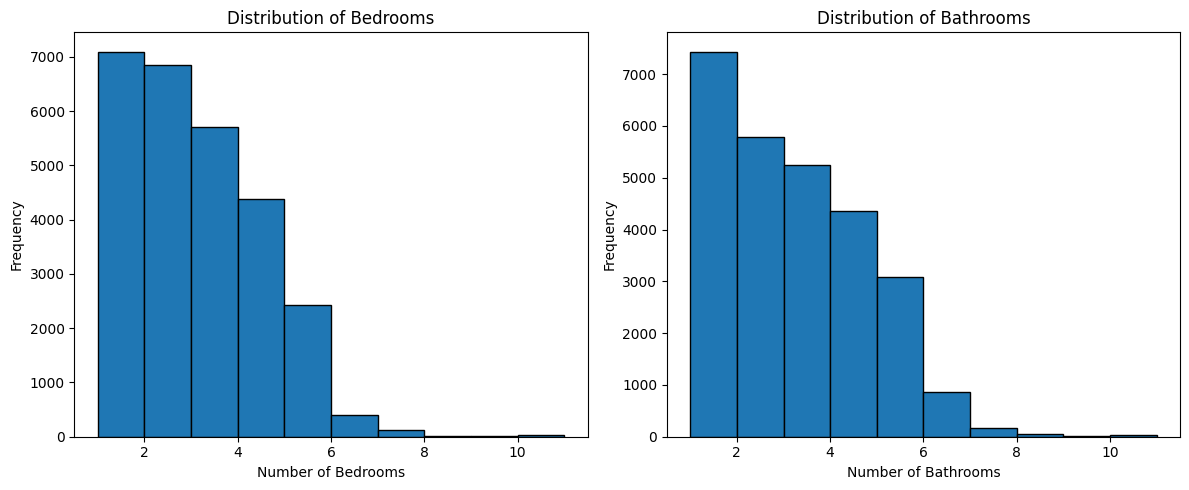

In [ ]:
# Plot histograms for bedrooms and bathrooms
plt.figure(figsize=(12, 5))

# Plot for Bedrooms
plt.subplot(1, 2, 1)
plt.hist(df['bedrooms'], bins=range(int(df['bedrooms'].min()), int(df['bedrooms'].max()) + 2), edgecolor='black')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Plot for Bathrooms
plt.subplot(1, 2, 2)
plt.hist(df['bathrooms'], bins=range(int(df['bathrooms'].min()), int(df['bathrooms'].max()) + 2), edgecolor='black')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# Checking for outliers in the bedroom column
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['bedrooms'] < (Q1 - 1.5 * IQR)) | (df['bedrooms'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
bedroom_outliers= df[(df['bedrooms'] < (Q1 - 1.5 * IQR)) | (df['bedrooms'] > (Q3 + 1.5 * IQR))].count().sum()

print(f'Number of outliers in the bedrooms column: {bedroom_outliers}')

from scipy import stats
# Calculating skewness and kurtosis
skewness = stats.skew(df['bedrooms'].dropna())
kurtosis = stats.kurtosis(df['bedrooms'].dropna())

print(f'Skewness of the bedrooms column: {skewness}')
print(f'Kurtosis of the bedrooms column: {kurtosis}')

Number of outliers in the bedrooms column: 311
Skewness of the bedrooms column: 0.708937804879667
Kurtosis of the bedrooms column: 0.41666306567609457


The analysis indicates the presence of outliers in the `bedrooms` column. The skewness of 0.7089 suggests a positive (right) skew, meaning that while most values are concentrated on the lower end, there are some higher values extending the distribution to the right. The kurtosis value, which is positive but less than 3, indicates that the distribution has lighter tails and a flatter peak compared to a normal distribution. This implies that there are fewer extreme values in the tails than would be expected in a normal distribution, as shown in the visualization.

In [ ]:
# Checking for outliers in the bathrooms column
# Define your criteria for identifying outliers
# For example, using the interquartile range (IQR) method
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
df[(df['bathrooms'] < (Q1 - 1.5 * IQR)) | (df['bathrooms'] > (Q3 + 1.5 * IQR))]

# Count the number of entries in the outliers section
bathrooms_outliers= df[(df['bathrooms'] < (Q1 - 1.5 * IQR)) | (df['bathrooms'] > (Q3 + 1.5 * IQR))].count().sum()

print(f'Number of outliers in the bathrooms column: {bathrooms_outliers}')

# Calculating skewness and kurtosis
skewness = stats.skew(df['bathrooms'].dropna())
kurtosis = stats.kurtosis(df['bathrooms'].dropna())

print(f'Skewness of the bathrooms column: {skewness}')
print(f'Kurtosis of the bathrooms column: {kurtosis}')

Number of outliers in the bathrooms column: 334
Skewness of the bathrooms column: 0.6503227639789104
Kurtosis of the bathrooms column: 0.00802739282888032


This analysis reveals outliers in the bathrooms column. The skewness of 0.6503 indicates a positive (right) skew, meaning most values are concentrated at the lower end, with a few higher values extending the distribution to the right. The kurtosis value of approximately 0.01 is close to zero, suggesting a relatively flat distribution compared to a normal distribution. This indicates that the tails of the distribution are lighter and less extreme than those of a normal distribution

Since the outliers are located on the right side of the columns, we will address them by replacing these outlier values with the maximum non-outlier values in their respective columns.

In [ ]:
def identify_and_cap_outliers(df, column):
    # Identifying outliers using IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Count initial outliers
    initial_outliers_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].count().sum()
    print(f"Number of outliers in {column} before capping: {initial_outliers_count}")

    # Calculate the maximum non-outlier value
    non_outlier_max = df[df[column] <= df[column].quantile(0.95)][column].max()

    # Replace outliers with the maximum non-outlier value
    df[column] = np.where(df[column] > non_outlier_max, non_outlier_max, df[column])

    # Count remaining outliers
    final_outliers_count = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))].count().sum()
    print(f"Number of outliers in {column} after capping: {final_outliers_count}")

# Apply the function to both columns
identify_and_cap_outliers(df, 'bedrooms')
identify_and_cap_outliers(df, 'bathrooms')

Number of outliers in bedrooms before capping: 311
Number of outliers in bedrooms after capping: 0
Number of outliers in bathrooms before capping: 334
Number of outliers in bathrooms after capping: 0


Let's visualize the new distribution of values in these columns.

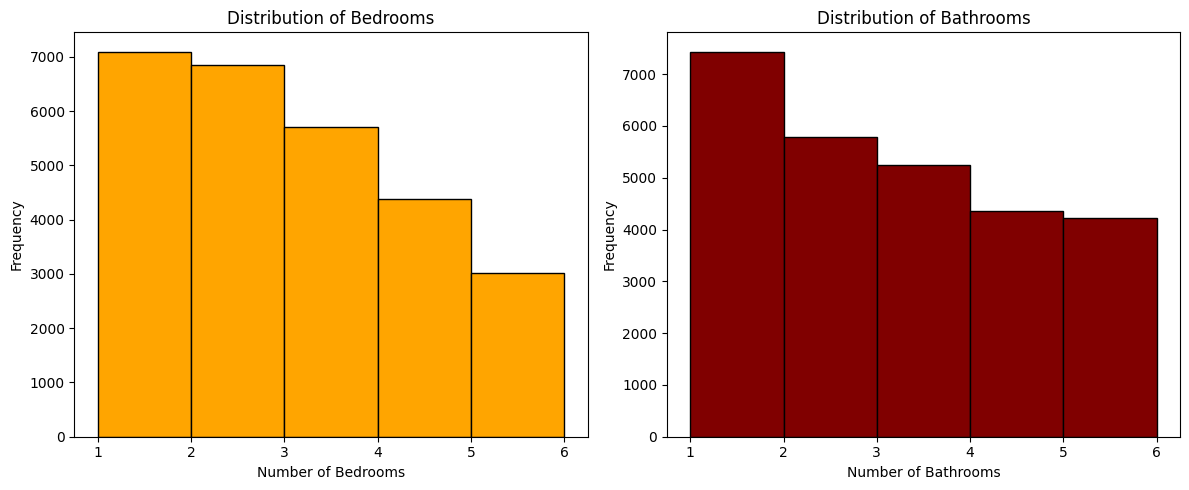

In [ ]:
# Plot histograms for bedrooms and bathrooms
plt.figure(figsize=(12, 5))

# Plot for Bedrooms
plt.subplot(1, 2, 1)
plt.hist(df['bedrooms'], bins=range(int(df['bedrooms'].min()), int(df['bedrooms'].max()) + 2), edgecolor='black', color= 'orange')
plt.title('Distribution of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')

# Plot for Bathrooms
plt.subplot(1, 2, 2)
plt.hist(df['bathrooms'], bins=range(int(df['bathrooms'].min()), int(df['bathrooms'].max()) + 2), edgecolor='black', color= 'maroon')
plt.title('Distribution of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

We have now resolved the number of outliers in the `bedrooms` and `bathrooms` columns. Now we will proceed to remove the `size` and 'bedrooms_equal_bathrooms` columns.

In [ ]:
df = df.drop(columns=['size', 'bedrooms_equal_bathrooms'])
df.head()

,bedrooms,bathrooms,property_type,purchase_type,price,new_sub_county
0,4.0,2.0,House,Sale,16400000.0,Langata & Kibra
1,4.0,4.0,House,Sale,59000000.0,Langata & Kibra
2,4.0,2.0,House,Sale,13000000.0,Embakasi Areas
3,5.0,5.0,House,Sale,55000000.0,Dagoretti North
4,4.0,4.0,House,Sale,17000000.0,Embakasi Areas


Let's proceed to check for outliers in the `price` column as earlier stated.

##Handling outliers in the `price` column.

We will start by grouping the data based on bedrooms, property_type, purchase_type, and new_sub_county. After grouping, we'll examine each group to identify any outliers in the price column.

In [ ]:
def find_price_outliers(df):
    # Group the data
    grouped = df.groupby(['bedrooms', 'property_type', 'purchase_type', 'new_sub_county'])

    outliers_info = []

    # Identify outliers in each group
    for name, group in grouped:
        # Calculate IQR for the price column
        Q1 = group['price'].quantile(0.25)
        Q3 = group['price'].quantile(0.75)
        IQR = Q3 - Q1

        # Identify outliers
        outliers = group[(group['price'] < (Q1 - 1.5 * IQR)) | (group['price'] > (Q3 + 1.5 * IQR))]
        outliers_count = outliers['price'].count()

        outliers_info.append({
            'bedrooms': name[0],
            'property_type': name[1],
            'purchase_type': name[2],
            'new_sub_county': name[3],
            'outliers_count': outliers_count
        })

    # Convert the list of dictionaries to a DataFrame
    outliers_df = pd.DataFrame(outliers_info)

    return outliers_df

# Get the outliers information
outliers_df = find_price_outliers(df)

# Print the DataFrame in a table format
print("Outliers Count by Group:")
outliers_df.head(100)

Outliers Count by Group:


,bedrooms,property_type,purchase_type,new_sub_county,outliers_count
0,1.0,Apartment,Rent,Dagoretti North,3
1,1.0,Apartment,Rent,Embakasi Areas,20
2,1.0,Apartment,Rent,Langata & Kibra,14
3,1.0,Apartment,Rent,Westlands & Starehe,8
4,1.0,Apartment,Sale,Dagoretti North,48
...,...,...,...,...,...
75,5.0,House,Rent,Westlands & Starehe,30
76,5.0,House,Sale,Dagoretti North,24
77,5.0,House,Sale,Embakasi Areas,2
78,5.0,House,Sale,Langata & Kibra,20


Outliers have been identified within these groupings, characterized by unusually low or high prices compared to the rest of the group. We will address this by replacing these outliers with the minimum non-outlier price for low outliers and the maximum non-outlier price for high outliers within their respective groups

In [ ]:
def replace_outliers(df):
    # Group the data
    grouped = df.groupby(['bedrooms', 'property_type', 'purchase_type', 'new_sub_county'])

    for name, group in grouped:
        # Calculate IQR for the price column
        Q1 = group['price'].quantile(0.25)
        Q3 = group['price'].quantile(0.75)
        IQR = Q3 - Q1

        # Determine minimum and maximum non-outlier values
        non_outlier_min = group[group['price'] >= (Q1 - 0.25 * IQR)]['price'].min() # Penalizing lower values more
        non_outlier_max = group[group['price'] <= (Q3 + 1.5 * IQR)]['price'].max() # Adopting a flexible approach toward higher values

        # Replace low outliers with the minimum non-outlier value
        df.loc[(df['price'] < (Q1 - 0.25 * IQR)) & (df['bedrooms'] == name[0]) &
               (df['property_type'] == name[1]) & (df['purchase_type'] == name[2]) &
               (df['new_sub_county'] == name[3]), 'price'] = non_outlier_min

        # Replace high outliers with the maximum non-outlier value
        df.loc[(df['price'] > (Q3 + 1.5 * IQR)) & (df['bedrooms'] == name[0]) &
               (df['property_type'] == name[1]) & (df['purchase_type'] == name[2]) &
               (df['new_sub_county'] == name[3]), 'price'] = non_outlier_max

# Apply the outlier replacement
replace_outliers(df)

print('Outliers handled successfully')

Outliers handled successfully


In [ ]:
# Check for 0 and NaN values in the price column
nan_values= df['price'].isna().sum()
zero_values= df['price'].isnull().sum()

print(f'Number of NaN values in the price column: {nan_values}')
print(f'Number of zero values in the price column: {zero_values}')

Number of NaN values in the price column: 14
Number of zero values in the price column: 14


We notice that there is existance of NaN and zero values in our `price` column. We can proceed to remove these values from our dataframe.

In [ ]:
df = df.dropna(subset=['price'])
df = df[df['price'] != 0]

print('NaN and zero values removed from the price column')

NaN and zero values removed from the price column


In [ ]:
df['price'].describe()

,price
count,2.704300e+04
mean,1.336366e+07
std,3.252543e+07
min,1.000000e+02
25%,2.500000e+04
50%,3.500000e+05
75%,1.200000e+07
max,3.500000e+08


In [ ]:
df.head()

,bedrooms,bathrooms,property_type,purchase_type,price,new_sub_county
0,4.0,2.0,House,Sale,16400000.0,Langata & Kibra
1,4.0,4.0,House,Sale,59000000.0,Langata & Kibra
2,4.0,2.0,House,Sale,13000000.0,Embakasi Areas
3,5.0,5.0,House,Sale,55000000.0,Dagoretti North
4,4.0,4.0,House,Sale,17000000.0,Embakasi Areas


## visualizing the distribution of the `property_type` and `purchase_type` columns

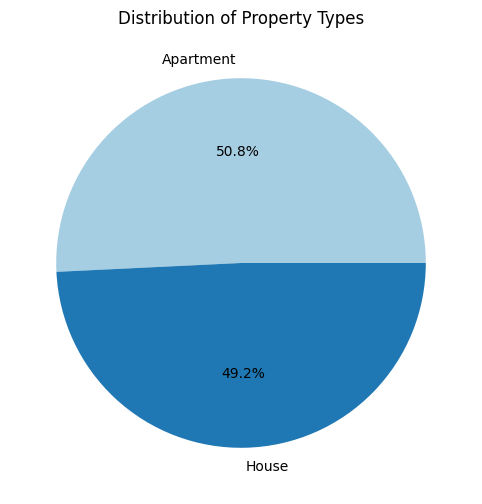

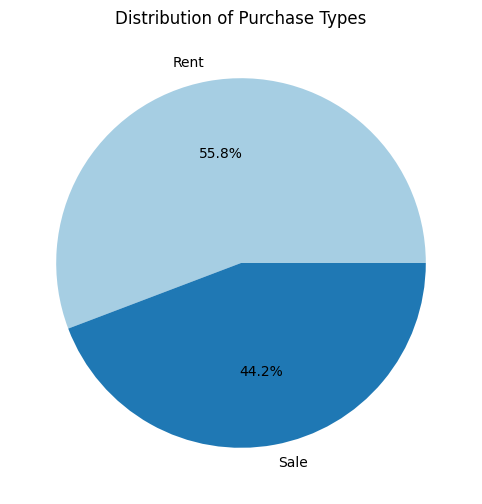

In [ ]:
def plot_pie_chart(column, title):
    # Count the occurrences of each unique value in the column
    counts = df[column].value_counts()

    # Create a pie chart
    plt.figure(figsize=(8, 6))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(counts))))
    plt.title(title)
    plt.show()

# Visualize the distribution of the 'property_type' column
plot_pie_chart('property_type', 'Distribution of Property Types')

# Visualize the distribution of the 'purchase_type' column
plot_pie_chart('purchase_type', 'Distribution of Purchase Types')

The distributions of the two columns are nearly balanced. This indicates a good spread of values, allowing us to move forward with feature engineering.

#Feature Engineering

Feature engineering is the process of creating new input features or modifying existing ones to improve the performance of machine learning models. It involves techniques such as transforming raw data, creating interaction features, and selecting relevant variables.

One enhancement we can make to our model is adding a total_rooms feature. This new feature aggregates the total number of rooms in a house, calculated as the sum of bedrooms, bathrooms, plus one kitchen and one living room. Including this feature can provide additional context and improve the model's ability to capture the overall size and functionality of a property.

##total_rooms column

In [ ]:
# Adding the 'total_rooms' column
df['total_rooms'] = df['bedrooms'] + df['bathrooms'] + 2  # Adding 2 for one kitchen and one living room

# Display the updated DataFrame
df.head()

,bedrooms,bathrooms,property_type,purchase_type,price,new_sub_county,total_rooms
0,4.0,2.0,House,Sale,16400000.0,Langata & Kibra,8.0
1,4.0,4.0,House,Sale,59000000.0,Langata & Kibra,10.0
2,4.0,2.0,House,Sale,13000000.0,Embakasi Areas,8.0
3,5.0,5.0,House,Sale,55000000.0,Dagoretti North,12.0
4,4.0,4.0,House,Sale,17000000.0,Embakasi Areas,10.0


Our data is now ready for modeling, Let's save this dataframe

In [ ]:
# Save the updated DataFrame to a CSV file
df.to_csv('final_cleaned_df.csv', index=False)

# Confirmation message
print("DataFrame has been saved to 'final_cleaned_df.csv'.")

DataFrame has been saved to 'final_cleaned_df.csv'.


#Multi-variate analysis

This will give us further insights on how all variables are correlated.

In [ ]:
# Identifying categorical variables
cat_columns = ['property_type', 'purchase_type', 'new_sub_county']

# Identifying numerical variables
num_columns = ['price', 'bedrooms', 'bathrooms', 'total_rooms']

from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding
for col in cat_columns:
    df[col] = label_encoder.fit_transform(df[col])

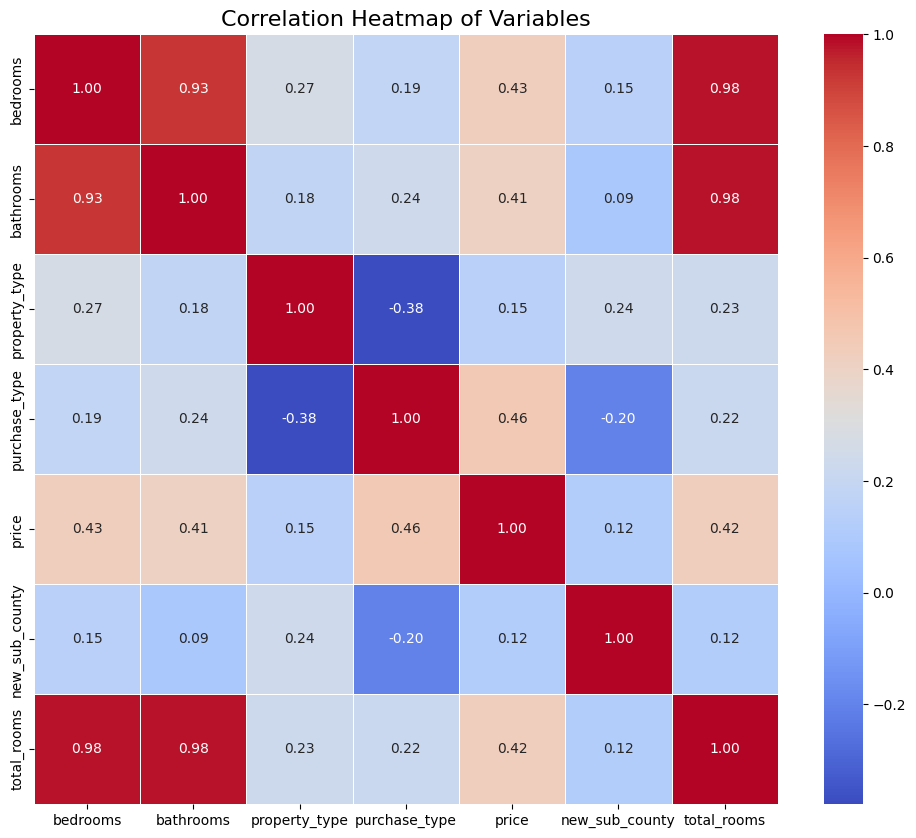

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Variables', fontsize=16)

# Show plot
plt.show()

#Conclusion from the Data Cleaning and EDA process.

From these initial steps, we can draw the following conclusions:

1. **Data Cleaning Challenges**: The data munging process was time-consuming due to the unclean nature of the dataset, which is typical for real-world, non-Kaggle datasets. The data was scraped from static websites (burentkenya.com and propertypro.co.ke) using BeautifulSoup, which presented several cleaning hurdles.

2. **Data Reduction**: Out of the 29,238 rows initially scraped, the final cleaned dataset contains 27,043 rows. This reduction reflects the effort to filter out irrelevant or erroneous data.

3. **Standardizing Location Data**: The 'full_location_details' column posed significant standardization challenges. A custom dictionary was created to categorize various locations into broader groups: Dagoretti North, Westlands & Starehe, Embakasi Areas, and Langata & Kibra. This dictionary will also be used during inferencing.

4. **Feature Engineering**: A new column, 'total_rooms,' was introduced. This feature is calculated by summing the total number of bedrooms, bathrooms, one kitchen, and one living room, reflecting the standard housing layout in Nairobi.

5. **Feature Standardization**: All features, including the target variable 'price,' have been standardized. The dataset is now prepared and ready for modeling.

#Modeling.

In [ ]:
# Load modeling-ready df
df = pd.read_csv('/content/drive/MyDrive/nairobi_house_price_prediction/final_cleaned_df.csv')
df.head()

,bedrooms,bathrooms,property_type,purchase_type,price,new_sub_county,total_rooms
0,4.0,2.0,House,Sale,16400000.0,Langata & Kibra,8.0
1,4.0,4.0,House,Sale,59000000.0,Langata & Kibra,10.0
2,4.0,2.0,House,Sale,13000000.0,Embakasi Areas,8.0
3,5.0,5.0,House,Sale,55000000.0,Dagoretti North,12.0
4,4.0,4.0,House,Sale,17000000.0,Embakasi Areas,10.0


##Data Pre-processing

In the following steps, we will proceed to preprocess our df by:
1. Identifying our dependent (input variables) and dependent
variables (predicted variable)
2. Splitting the data into train and test.
3. Preprocess our categorical and numerical variables

###1. Identifying Dependent & Independent Variables.

In [ ]:
# Separating the dataset into dependent and independent variables

# Independent columns
X = df.drop('price', axis=1)

# Dependent columns
y = df['price']

###2. Splitting Data into train and test sets.

In [ ]:
# Dividing into 70% train set and 30% test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(18930, 6)
(8113, 6)
(18930,)
(8113,)


Text(0.5, 1.0, 'Distribution of Training and Testing Sets')

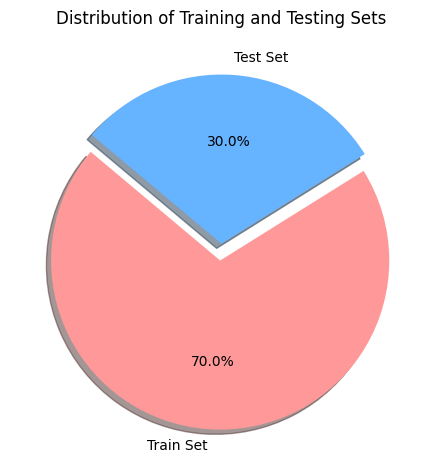

In [ ]:
# Plot distribution of training and testing sets
labels = ['Train Set', 'Test Set']
sizes = [X_train.shape[0], X_test.shape[0]]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Distribution of Training and Testing Sets')

###3. Encoding and Scaling

In [ ]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.9 MB/s eta 0:00:00


In [ ]:
# Libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from category_encoders import TargetEncoder
import joblib

In [ ]:
# Select quantitative and categorical variables
numerical_variables = X_train.select_dtypes(include=["int", "float"]).columns.to_list()
categorical_variables = X_train.select_dtypes(include=["object", "category"]).columns.to_list()

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('te', TargetEncoder(min_samples_leaf=1, smoothing=10), categorical_variables),
        ('scaler', MinMaxScaler(), numerical_variables)],
    remainder="passthrough",
    verbose_feature_names_out=False
).set_output(transform="pandas")

# Tune and transform the preprocessor on training set
X_train_prep = preprocessor.fit_transform(X_train, y_train)

# Transform test set
X_test_prep = preprocessor.transform(X_test)

# Check sizes
print(f"X train shape: {X_train_prep.shape}")
print(f"X test shape: {X_test_prep.shape}")

# Save the preprocessor
preprocessor_path = 'preprocessor.pkl'
joblib.dump(preprocessor, preprocessor_path)
print(f"Preprocessor saved to {preprocessor_path}")

from google.colab import files

files.download(preprocessor_path)

X train shape: (18930, 6)
X test shape: (8113, 6)
Preprocessor saved to preprocessor.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Model Training & Evaluation

###Identifying Models and Evaluation Metrics

This is a regression problem because it involves predicting numerical values, specifically the cost of properties, whether for rental or sale. Several algorithms are suitable for this task, including Linear Regression, Random Forest, Support Vector Machines (SVM), Multi-Layer Perceptron (MLP), Logistic Regression, and Convolutional Neural Networks (CNN).

For model evaluation, since our goal is to estimate approximate property prices rather than exact values, we should focus on metrics beyond traditional accuracy. Useful evaluation metrics for this problem include Mean Squared Error (MSE), R-squared (R²), Cross-Validation Mean Score (CV Mean Score), and Cross-Validation Standard Deviation. These metrics will help us assess the model's performance more effectively in predicting property prices.

Here's a brief overview of the evaluation metrics we will use:

1. **Mean Squared Error (MSE)**: This metric calculates the average of the squared differences between the actual and predicted values on the training set. A lower MSE indicates that the model's predictions are closer to the actual values, thus reflecting better performance.

2. **R-squared (R²)**: This statistic shows the proportion of the variance in the dependent variable that is predictable from the independent variable. R² ranges from 0 to 1, with a value closer to 1 indicating that the model explains a large proportion of the variance in the dependent variable.

3. **Cross-validation Mean Score (CV Mean Score)**: This is the average score obtained from cross-validation, a technique that splits the training data into subsets (folds) to assess model performance. The mean score from cross-validation helps estimate how well the model will perform on new, unseen data. A higher score reflects better performance.

4. **Cross-validation Standard Deviation**: This measures the variability in cross-validation scores across different folds. A lower standard deviation indicates that the model's performance is consistent across different subsets of the data, while a higher standard deviation suggests that the model's performance is more variable, which could indicate overfitting or sensitivity to specific data subsets.

These metrics will help us gauge the effectiveness and reliability of our models.

###Base models-training

In this section, we'll identify and train models relevant to our task using our dataset, and evaluate their performance with specific metrics.

Training Linear Regression...
Linear Regression saved to linear_regression_model.pkl

Training Random Forest...
Random Forest saved to random_forest_model.pkl

Training Gradient Boosting...
Gradient Boosting saved to gradient_boosting_model.pkl

Linear Regression:
  MSE: 603335477914297.0
  R2: 0.39238863130209156
  CV Mean Score: 0.3917414870570636
  CV Std Dev: 0.011739312277683347

Random Forest:
  MSE: 252681149017086.03
  R2: 0.7455280777964779
  CV Mean Score: 0.7478887227021115
  CV Std Dev: 0.008628487818720079

Gradient Boosting:
  MSE: 276918629335672.5
  R2: 0.7211188243557961
  CV Mean Score: 0.7285465759077852
  CV Std Dev: 0.007677866271163776



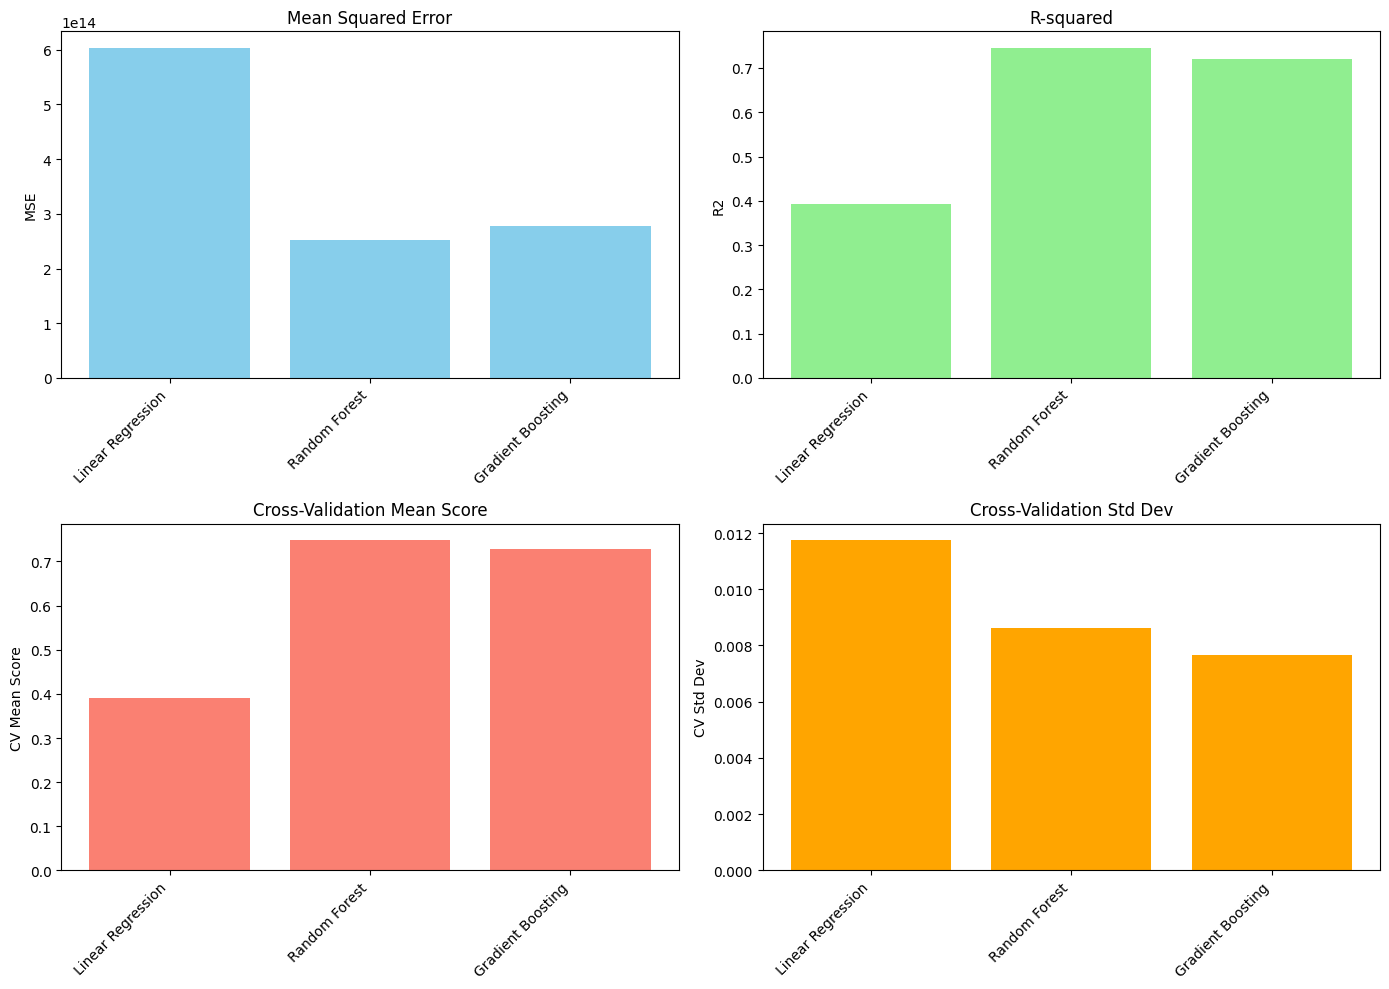

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
}

# Dictionary to store model performances
model_performance = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train_prep, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_prep)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_prep, y_train, cv=5)

    # Store performance
    model_performance[model_name] = {
        "MSE": mse,
        "R2": r2,
        "CV Mean Score": cv_scores.mean(),
        "CV Std Dev": cv_scores.std()
    }

    # Save the model
    model_path = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    joblib.dump(model, model_path)
    print(f"{model_name} saved to {model_path}\n")

# Display model performances
for model_name, performance in model_performance.items():
    print(f"{model_name}:")
    print(f"  MSE: {performance['MSE']}")
    print(f"  R2: {performance['R2']}")
    print(f"  CV Mean Score: {performance['CV Mean Score']}")
    print(f"  CV Std Dev: {performance['CV Std Dev']}\n")

# Visualization of model performance
metrics = ['MSE', 'R2', 'CV Mean Score', 'CV Std Dev']
model_names = list(model_performance.keys())

# Prepare data for plotting
mse_values = [model_performance[model]['MSE'] for model in model_names]
r2_values = [model_performance[model]['R2'] for model in model_names]
cv_mean_values = [model_performance[model]['CV Mean Score'] for model in model_names]
cv_std_values = [model_performance[model]['CV Std Dev'] for model in model_names]

x = np.arange(len(model_names))  # the label locations

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE Plot
ax[0, 0].bar(x, mse_values, color='skyblue')
ax[0, 0].set_ylabel('MSE')
ax[0, 0].set_title('Mean Squared Error')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(model_names, rotation=45, ha='right')

# R2 Plot
ax[0, 1].bar(x, r2_values, color='lightgreen')
ax[0, 1].set_ylabel('R2')
ax[0, 1].set_title('R-squared')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(model_names, rotation=45, ha='right')

# CV Mean Score Plot
ax[1, 0].bar(x, cv_mean_values, color='salmon')
ax[1, 0].set_ylabel('CV Mean Score')
ax[1, 0].set_title('Cross-Validation Mean Score')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(model_names, rotation=45, ha='right')

# CV Std Dev Plot
ax[1, 1].bar(x, cv_std_values, color='orange')
ax[1, 1].set_ylabel('CV Std Dev')
ax[1, 1].set_title('Cross-Validation Std Dev')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(model_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Download the models (only needed if running in Google Colab)
from google.colab import files

for model_name in models.keys():
    model_path = f"{model_name.replace(' ', '_').lower()}_model.pkl"
    files.download(model_path)

###Hyperparameter Tuning and Ensemble Modeling

Hyperparameter tuning is crucial for enhancing the performance of machine learning models. In our approach, we will employ both Grid Search and Random Search to find the best hyperparameters. For this particular analysis, Grid Search and Random Search will be applied to the Random Forest and Gradient Boosting models, as these are well-suited for such optimization techniques. We will also use an ensemble of the two models and evaluate their performance then identify the best model for inferencing and deployment.

Tuning Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_split': 6, 'n_estimators': 100}
Random Forest tuned model saved to random_forest_tuned_model.pkl

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300}
Gradient Boosting tuned model saved to gradient_boosting_tuned_model.pkl

Ensemble model saved to ensemble_model.pkl

Random Forest (Tuned):
  MSE: 252721957106355.03
  R2: 0.7454869804967461
  CV Mean Score: 0.7479156512932886
  CV Std Dev: 0.008619051509045619

Gradient Boosting (Tuned):
  MSE: 263204333981000.16
  R2: 0.7349303141093682
  CV Mean Score: 0.7487176545325187
  CV Std Dev: 0.006014343354667596

Ensemble (Tuned):
  MSE: 254765259388445.94
  R2: 0.7434291971544226
  CV Mean Score: 0.7490005939974417
  CV Std Dev: 0.006913177300498627



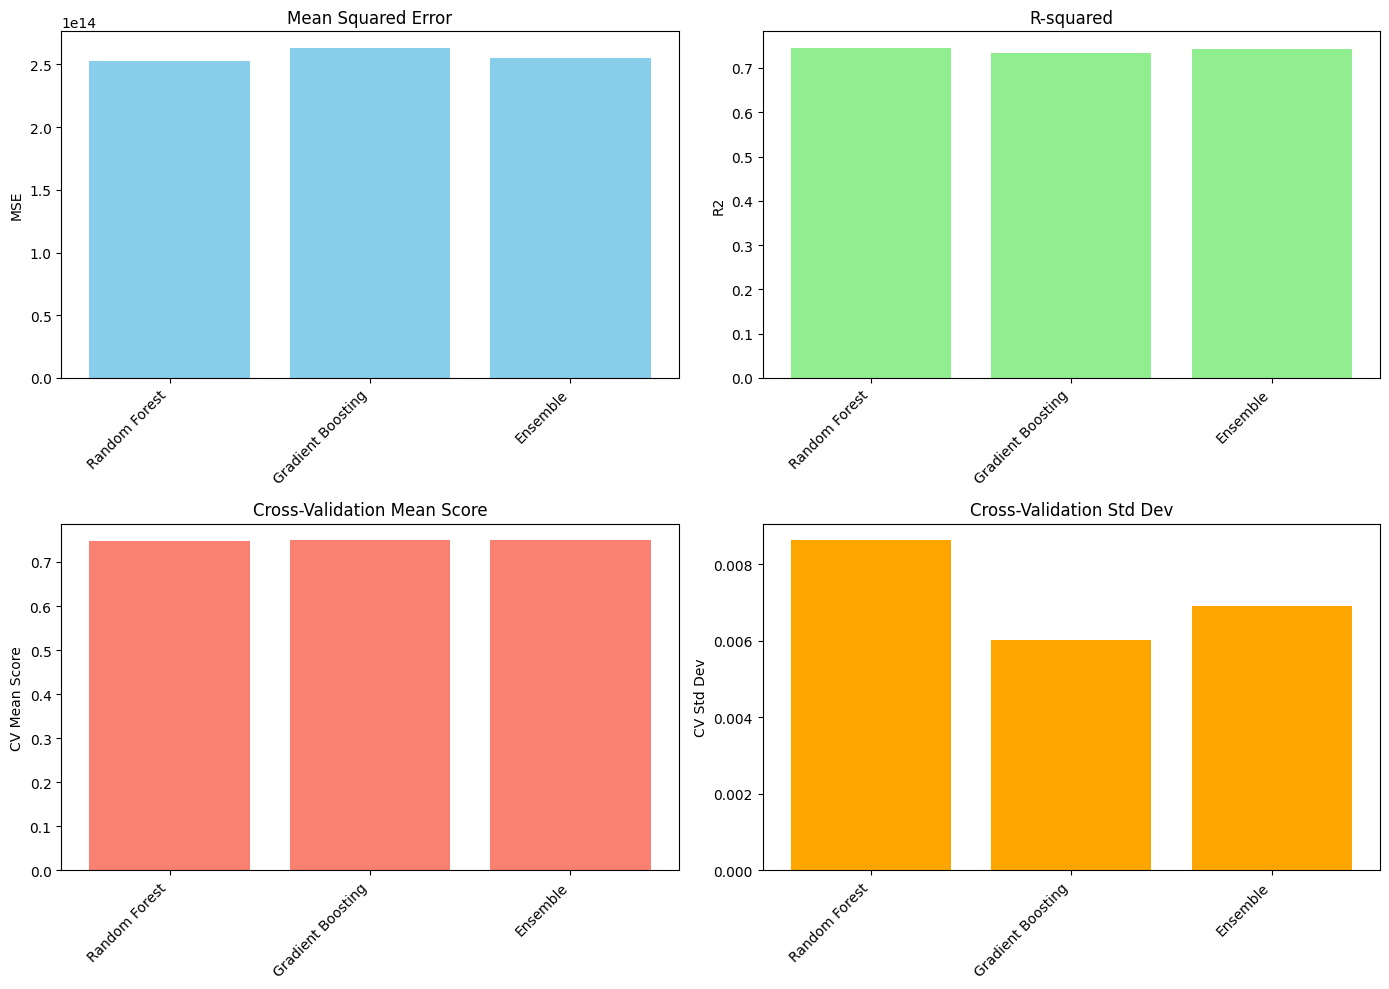

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor


# Define the hyperparameter grid for each model
param_grid = {
    "Random Forest": {
        'n_estimators': [100, 200, 300, 400, 500, 600],
        'max_depth': [10, 20, 30, 40, 50, 60],
        'min_samples_split': [2, 4, 5, 6, 8, 10]
    },
    "Gradient Boosting": {
        'n_estimators': [100, 200, 300, 400, 500, 600],
        'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
        'max_depth': [2, 4, 5, 6, 8, 10]
    }
}

# Initialize models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    # Add other models if needed
}

# Dictionary to store tuned model performances
tuned_model_performance = {}

# Dictionary to store the best models for ensemble
best_models = {}

# Train and evaluate each model with hyperparameter tuning
for model_name, model in models.items():
    print(f"Tuning {model_name}...")

    # Skip hyperparameter tuning for Linear Regression as it doesn't have major hyperparameters
    if model_name in param_grid:
        grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name],
                                   scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid_search.fit(X_train_prep, y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        best_model = model
        best_model.fit(X_train_prep, y_train)

    # Predict on the test set
    y_pred = best_model.predict(X_test_prep)

    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Cross-validation with the best model
    cv_scores = cross_val_score(best_model, X_train_prep, y_train, cv=5)

    # Store performance
    tuned_model_performance[model_name] = {
        "MSE": mse,
        "R2": r2,
        "CV Mean Score": cv_scores.mean(),
        "CV Std Dev": cv_scores.std()
    }

    # Save the tuned model
    model_path = f"{model_name.replace(' ', '_').lower()}_tuned_model.pkl"
    joblib.dump(best_model, model_path)
    print(f"{model_name} tuned model saved to {model_path}\n")

    # Add to the best_models dictionary for ensemble
    best_models[model_name] = best_model

# Create an ensemble model using Voting Regressor
ensemble_model = VotingRegressor(estimators=[(name, model) for name, model in best_models.items()])
ensemble_model.fit(X_train_prep, y_train)

# Predict with the ensemble model
y_pred_ensemble = ensemble_model.predict(X_test_prep)

# Calculate performance metrics for the ensemble model
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)
cv_scores_ensemble = cross_val_score(ensemble_model, X_train_prep, y_train, cv=5)

# Store ensemble model performance
tuned_model_performance['Ensemble'] = {
    "MSE": mse_ensemble,
    "R2": r2_ensemble,
    "CV Mean Score": cv_scores_ensemble.mean(),
    "CV Std Dev": cv_scores_ensemble.std()
}

# Save the ensemble model
ensemble_model_path = "ensemble_model.pkl"
joblib.dump(ensemble_model, ensemble_model_path)
print(f"Ensemble model saved to {ensemble_model_path}\n")

# Display tuned model performances
for model_name, performance in tuned_model_performance.items():
    print(f"{model_name} (Tuned):")
    print(f"  MSE: {performance['MSE']}")
    print(f"  R2: {performance['R2']}")
    print(f"  CV Mean Score: {performance['CV Mean Score']}")
    print(f"  CV Std Dev: {performance['CV Std Dev']}\n")

# Visualization of model performance
metrics = ['MSE', 'R2', 'CV Mean Score', 'CV Std Dev']
model_names = list(tuned_model_performance.keys())

# Prepare data for plotting
mse_values = [tuned_model_performance[model]['MSE'] for model in model_names]
r2_values = [tuned_model_performance[model]['R2'] for model in model_names]
cv_mean_values = [tuned_model_performance[model]['CV Mean Score'] for model in model_names]
cv_std_values = [tuned_model_performance[model]['CV Std Dev'] for model in model_names]

x = np.arange(len(model_names))  # the label locations

fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# MSE Plot
ax[0, 0].bar(x, mse_values, color='skyblue')
ax[0, 0].set_ylabel('MSE')
ax[0, 0].set_title('Mean Squared Error')
ax[0, 0].set_xticks(x)
ax[0, 0].set_xticklabels(model_names, rotation=45, ha='right')

# R2 Plot
ax[0, 1].bar(x, r2_values, color='lightgreen')
ax[0, 1].set_ylabel('R2')
ax[0, 1].set_title('R-squared')
ax[0, 1].set_xticks(x)
ax[0, 1].set_xticklabels(model_names, rotation=45, ha='right')

# CV Mean Score Plot
ax[1, 0].bar(x, cv_mean_values, color='salmon')
ax[1, 0].set_ylabel('CV Mean Score')
ax[1, 0].set_title('Cross-Validation Mean Score')
ax[1, 0].set_xticks(x)
ax[1, 0].set_xticklabels(model_names, rotation=45, ha='right')

# CV Std Dev Plot
ax[1, 1].bar(x, cv_std_values, color='orange')
ax[1, 1].set_ylabel('CV Std Dev')
ax[1, 1].set_title('Cross-Validation Std Dev')
ax[1, 1].set_xticks(x)
ax[1, 1].set_xticklabels(model_names, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Download the models (only needed if running in Google Colab)
from google.colab import files

for model_name in tuned_model_performance.keys():
    # Use the correct file name based on how you saved it
    if model_name == 'Ensemble':
        model_path = "ensemble_model.pkl"  # Correct file name for the ensemble model
    else:
        model_path = f"{model_name.replace(' ', '_').lower()}_tuned_model.pkl"
    files.download(model_path)

##Conclusion on the Modeling.

From the model training phase, we can draw the following conclusions:

1. **Model Performance Insights**: During baseline model training, the Random Forest algorithm outperformed the Gradient Boosting method slightly. In contrast, the Linear Regression model underperformed compared to the other approaches.
   
2. **Fine-Tuning and Ensemble Insights**: After fine-tuning the Random Forest and Gradient Boosting models using Grid Search, the ensemble of these two models demonstrated consistent performance improvements compared to the individual models. Therefore, we plan to proceed with deploying the ensemble model.

Before we move forward, we need to develop an inferencing script. We can try out the different models to inference but will only deploy the ensemble model.

#Inferencing.

Before proceeding, we need to develop an inferencing script. While we will evaluate different models for inference, we will only deploy the ensemble model.

For inference, we will use data that was not part of the training set, such as a 9-bedroom, 10-bathroom rental apartment in the Embakasi Areas.

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.9 MB/s eta 0:00:00


In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import joblib

##a)Using the tuned Gradient Boosting Model

In [33]:
# Load the saved gradient_boosting_model
model_path = '/content/drive/MyDrive/nairobi_house_price_prediction/gradient_boosting_tuned_model.pkl'  # path to your saved model
gradient_boosting_model = joblib.load(model_path)

# Load the preprocessor object
preprocessor_path = '/content/drive/MyDrive/nairobi_house_price_prediction/preprocessor.pkl'  # path to your saved preprocessor
preprocessor = joblib.load(preprocessor_path)  # Load the preprocessor

def preprocess_and_predict(bedrooms, bathrooms, property_type, purchase_type, new_sub_county):
    # Calculate total_rooms
    total_rooms = bedrooms + bathrooms + 2

    # Prepare input data as DataFrame
    data = {
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'property_type': [property_type],
        'purchase_type': [purchase_type],
        'new_sub_county': [new_sub_county],
        'total_rooms': [total_rooms]
    }
    df = pd.DataFrame(data)

    # Apply preprocessor transformations
    df_prepared = preprocessor.transform(df)

    # Predict using the model
    prediction = gradient_boosting_model.predict(df_prepared)[0]

    return prediction

def interactive_predict():
    print("Welcome to the Property Price Prediction System")
    print("Please enter the following information:")
    bedrooms = int(input("Number of Bedrooms: "))
    bathrooms = int(input("Number of Bathrooms: "))
    property_type = input("Property Type (i.e, House or Apartment): ")
    purchase_type = input("Purchase Type (i.e, Rent or Sale): ")
    new_sub_county = input("Enter Location: ")

    # Predict using the function
    prediction = preprocess_and_predict(
        bedrooms, bathrooms, property_type, purchase_type, new_sub_county
    )

    # Round prediction to 2 decimal places
    prediction = round(prediction, 2)

    # Print prediction and probability
    if purchase_type.lower() == 'rent':
        print(f"\nPredicted Monthly Rent(Ksh):{prediction:.2f} (per month)")
    else:
        print(f"\nPredicted Price (Ksh):{prediction:.2f}")

# Run interactive prediction
interactive_predict()

Welcome to the Property Price Prediction System
Please enter the following information:
Number of Bedrooms: 9
Number of Bathrooms: 10
Property Type (i.e, House or Apartment): Apartment
Purchase Type (i.e, Rent or Sale): Rent
Enter Location: Embakasi Areas

Predicted Monthly Rent(Ksh):17185223.85 (per month)


##b) Using the tuned Random Forest Model

In [32]:
# Load the saved random_forest_model
model_path = '/content/drive/MyDrive/nairobi_house_price_prediction/random_forest_tuned_model.pkl'  # path to your saved model
random_forest_model = joblib.load(model_path)

# Load the preprocessor object
preprocessor_path = '/content/drive/MyDrive/nairobi_house_price_prediction/preprocessor.pkl'  # path to your saved preprocessor
preprocessor = joblib.load(preprocessor_path)  # Load the preprocessor

def preprocess_and_predict(bedrooms, bathrooms, property_type, purchase_type, new_sub_county):
    # Calculate total_rooms
    total_rooms = bedrooms + bathrooms + 2

    # Prepare input data as DataFrame
    data = {
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'property_type': [property_type],
        'purchase_type': [purchase_type],
        'new_sub_county': [new_sub_county],
        'total_rooms': [total_rooms]
    }
    df = pd.DataFrame(data)

    # Apply preprocessor transformations
    df_prepared = preprocessor.transform(df)

    # Predict using the model
    prediction = random_forest_model.predict(df_prepared)[0]

    return prediction

def interactive_predict():
    print("Welcome to the Property Price Prediction System")
    print("Please enter the following information:")
    bedrooms = int(input("Number of Bedrooms: "))
    bathrooms = int(input("Number of Bathrooms: "))
    property_type = input("Property Type (i.e, House or Apartment): ")
    purchase_type = input("Purchase Type (i.e, Rent or Sale): ")
    new_sub_county = input("Enter Location: ")

    # Predict using the function
    prediction = preprocess_and_predict(
        bedrooms, bathrooms, property_type, purchase_type, new_sub_county
    )

    # Round prediction to 2 decimal places
    prediction = round(prediction, 2)

    # Print prediction and probability
    if purchase_type.lower() == 'rent':
        print(f"\nPredicted Monthly Rent(Ksh):{prediction:.2f} (per month)")
    else:
        print(f"\nPredicted Price (Ksh):{prediction:.2f}")

# Run interactive prediction
interactive_predict()

Welcome to the Property Price Prediction System
Please enter the following information:
Number of Bedrooms: 9
Number of Bathrooms: 10
Property Type (i.e, House or Apartment): Apartment
Purchase Type (i.e, Rent or Sale): Rent
Enter Location: Embakasi Areas

Predicted Monthly Rent(Ksh):271713.35 (per month)


##c) Using the ensemble Model

In [36]:
# Load the saved ensemble model
model_path = '/content/drive/MyDrive/nairobi_house_price_prediction/ensemble_model.pkl'  # path to your saved model
ensemble_model = joblib.load(model_path)

# Load the preprocessor object
preprocessor_path = '/content/drive/MyDrive/nairobi_house_price_prediction/preprocessor.pkl'  # path to your saved preprocessor
preprocessor = joblib.load(preprocessor_path)  # Load the preprocessor

def preprocess_and_predict(bedrooms, bathrooms, property_type, purchase_type, new_sub_county):
    # Calculate total_rooms
    total_rooms = bedrooms + bathrooms + 2

    # Prepare input data as DataFrame
    data = {
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'property_type': [property_type],
        'purchase_type': [purchase_type],
        'new_sub_county': [new_sub_county],
        'total_rooms': [total_rooms]
    }
    df = pd.DataFrame(data)

    # Apply preprocessor transformations
    df_prepared = preprocessor.transform(df)

    # Predict using the model
    prediction = ensemble_model.predict(df_prepared)[0]

    return prediction

def interactive_predict():
    print("Welcome to the Property Price Prediction System")
    print("Please enter the following information:")
    bedrooms = int(input("Number of Bedrooms: "))
    bathrooms = int(input("Number of Bathrooms: "))
    property_type = input("Property Type (i.e, House or Apartment): ")
    purchase_type = input("Purchase Type (i.e, Rent or Sale): ")
    new_sub_county = input("Enter Location: ")

    # Predict using the function
    prediction = preprocess_and_predict(
        bedrooms, bathrooms, property_type, purchase_type, new_sub_county
    )

    # Round prediction to 2 decimal places
    prediction = round(prediction, 2)

    if purchase_type.lower() == 'rent':
        print(f"\nPredicted Monthly Rent(Ksh):{prediction:.2f} (per month)")
    else:
        print(f"\nPredicted Price (Ksh):{prediction:.2f}")

# Run interactive prediction
interactive_predict()

Welcome to the Property Price Prediction System
Please enter the following information:
Number of Bedrooms: 9
Number of Bathrooms: 10
Property Type (i.e, House or Apartment): Apartment
Purchase Type (i.e, Rent or Sale): Rent
Enter Location: Embakasi Areas

Predicted Monthly Rent(Ksh):8728468.60 (per month)
